# Introdução ao SageMath
***

## Sage

### O que é o Sage?

- Sage é um sistema de computação simbólica 
- Oferece uma interface em Python para Álgebra, Grafos, Análise Numérica, e muito mais
- No Backend, usa sistemas como LAPACK, ATLAS, PARI/GP e M4RI
- Distribuído sob a licença GPLv3


Formalmente ( :
$$
\text{Sage} > \left( \text{Magma} \cup \text{Maple} \cup \text{Mathematica} \cup \text{MATLAB} \right)
$$

Há duas semanas dei uma monitoria básica sobre Sage, que pode ser acessada aqui:
https://drive.google.com/file/d/1Lf7AWQ92n7Scft1OoR_DRT3ufEgt7oLv/view?usp=sharing

O texto auxiliar está aqui:
https://github.com/thalespaiva/monitoria-cripto/blob/master/intro-sage-ep1.ipynb

**Mas o que é computação simbólica?**

Sistemas de computação simbólica permitem trabalhar com expressões matemáticas:

In [1]:
x, y = var('x, y')

In [2]:
f(x, y) = x**2 + y**2
print(f)

(x, y) |--> x^2 + y^2


In [272]:
f.derivative()

(x, y) |--> (2*x, 2*y)

In [274]:
plot3d(f, (x, -1, 1), (y, -1, 1))

Graphics3d Object

**Importante.** Quando queremos respostas numéricas, computação simbólica mais atrapalha do que ajuda.

In [415]:
93/13 + (130 - 93)/13

10

In [111]:
log(1201, 2)

log(1201)/log(2)

Para obtermos a aproximação numérica de uma expressão, usamos a função `n` que toma como parâmetros uma expressão  e, opcionalmente, o número de dígitos da aproximação.

In [112]:
n(93/13)

7.15384615384615

In [114]:
n(log(1201, 2), digits=30)

10.2300204357056340945901830909

In [5]:
numerical_approx(log(1201, 2))

10.2300204357056

### Para que usar Sage?

Vamos comparar código em C e Sage para fazer multiplicações de matrizes binárias.

Em C, a biblioteca mais rápida para fazer multiplicação binária eficiente é chamada M4RI. 

Considere a implementação abaixo:

```C
mzd_t* multiply_two_random_matrices(rci_t n) {
  mzd_t* A = mzd_init(n, n);
  mzd_t* B = mzd_init(n, n);
  mzd_randomize(A);
  mzd_randomize(B);
  mzd_t* C = mzd_mul(NULL, A, B, NULL);
  
  mzd_free(A);
  mzd_free(B);
    
  return C;
}
```

Agora o código em Sage que realiza exatemente a mesma computação:

In [7]:
def multiply_two_random_matrices(n):
    A = random_matrix(GF(2), n, n)
    B = random_matrix(GF(2), n, n)
    return A*B

In [8]:
C = multiply_two_random_matrices(8)
print(C)

[0 0 0 0 1 0 0 1]
[0 0 0 0 0 0 0 0]
[1 1 1 1 0 1 0 1]
[1 1 1 0 0 1 1 0]
[0 0 1 1 1 1 0 0]
[0 1 0 0 0 0 0 1]
[0 1 1 0 1 1 1 0]
[0 1 1 1 1 1 0 1]


As duas implementações rodam em tempo similar **pois Sage chama a rotina da M4RI para fazer a multiplicação!**

Além disso, temos a vantagem de ter a mesma interface para vários sistemas bem diferentes entre si. Por exemplo: podemos usar $\mathbf{C}$ diretamente como matriz de adjacência para construir um grafo

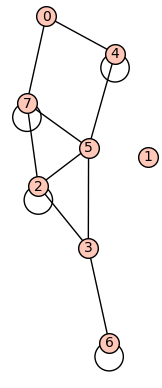

In [10]:
G = sage.graphs.graph.Graph(C, format='adjacency_matrix')
plot(G)

Podemos obter informações importantes sobre o grafo gerado. Por exemplo, se o grafo é conexo ou não.

In [11]:
G.is_connected()

False

Por onde você começaria a implementar em C isso que acabamos de fazer tão facilmente?


### Como usar o Sage?


O SageMath pode ser usado de 3 formas:
- Usando o Jupyter Notebook (essa é a forma sendo usada neste documento)
- Com um interpretador interativo (como Python): 
- Por meio de scripts (como Python)


Para o EP, vocês deverão entregar um script `.py`.

Um dos melhores editores para isso é o Atom (https://atom.io/), porém qualquer editor de texto pode ser usado.

Para que seu script possa usar todas as funções do sage, ele deve conter `from sage.all import *` no topo.

`script.py`
```python
from sage.all import *

def func1():
    print('Esta é a função 1')

def func2():
    print('Esta é a função 2')

if __name__ == "__main__":
    func1()  # Chama a função 1
    func2()  # Chama a função 2


```

Para rodar o arquivo `script.py`, use:

`sage script.py`

Para a depuração do seu script, é muito útil rodar o script dentro do interpretador interativo do Sage. Da mesma forma que fazemos isso no iPython, podemos rodar `%run script.py` dentro do Sage.

```
/home/user/$ sage
┌────────────────────────────────────────────────────────────────────┐
  SageMath version 9.0, Release Date: 2020-01-01                                  
  Using Python 3.8.2. Type "help()" for help.                                     
└────────────────────────────────────────────────────────────────────┘
sage: %run script.py 
```

## Aritmética modular

Nesta seção, trataremos de $Z_n$, que é o anel de inteiros módulo $n$. 
Primeiro relembremos a definição de Anel.

**Definição.** Um anel $R$ é um conjunto munido de duas operações $+$ (adição) e $.$ (multiplicação), que, para todos $a, b, c \in R$, satisfazem:
1. Associatividade de $+$
$$
(a + b) + c = a + ( b + c)
$$
2. Comutatividade de $+$
$$
a + b = b + a
$$
3. Existência do identidade de $+$. Existe um elemento $0 \in R$ tal que 
    $$
    a + 0 = a
    $$

4. Existência da inversa aditiva. Existe um elemento $(-a) \in R$ tal que 
    $$
    a + (-a) = 0
    $$

5. Associatividade de $.$
$$
(a b) c = a ( b c)
$$
6. Existência da identidade de $.$

    Existe um elemento $1 \in R$ tal que 
    $$ 
    a1 = 1a = a
    $$
7. Distributividade de $.$ sobre $+$:
$$
    (a + b)c = ac + bc \\
    c(a + b) = ca + cb
$$

**Importante**. Note que num anel não é necessário que $.$ seja comutativa, e nem que exista a inversa multiplicativa de todos os elementos.


Em Sage, é muito simples trabalhar com $Z_n$, o anel de inteiros $\bmod n$.

In [13]:
n = 13

In [14]:
Zn = Integers(n)
print(Zn)

Ring of integers modulo 13


In [15]:
Zn.addition_table(names='elements')

 +   0  1  2  3  4  5  6  7  8  9 10 11 12
  +---------------------------------------
 0|  0  1  2  3  4  5  6  7  8  9 10 11 12
 1|  1  2  3  4  5  6  7  8  9 10 11 12  0
 2|  2  3  4  5  6  7  8  9 10 11 12  0  1
 3|  3  4  5  6  7  8  9 10 11 12  0  1  2
 4|  4  5  6  7  8  9 10 11 12  0  1  2  3
 5|  5  6  7  8  9 10 11 12  0  1  2  3  4
 6|  6  7  8  9 10 11 12  0  1  2  3  4  5
 7|  7  8  9 10 11 12  0  1  2  3  4  5  6
 8|  8  9 10 11 12  0  1  2  3  4  5  6  7
 9|  9 10 11 12  0  1  2  3  4  5  6  7  8
10| 10 11 12  0  1  2  3  4  5  6  7  8  9
11| 11 12  0  1  2  3  4  5  6  7  8  9 10
12| 12  0  1  2  3  4  5  6  7  8  9 10 11


In [130]:
Zn.multiplication_table(names='elements')

 *   0  1  2  3  4  5  6  7  8  9 10 11 12
  +---------------------------------------
 0|  0  0  0  0  0  0  0  0  0  0  0  0  0
 1|  0  1  2  3  4  5  6  7  8  9 10 11 12
 2|  0  2  4  6  8 10 12  1  3  5  7  9 11
 3|  0  3  6  9 12  2  5  8 11  1  4  7 10
 4|  0  4  8 12  3  7 11  2  6 10  1  5  9
 5|  0  5 10  2  7 12  4  9  1  6 11  3  8
 6|  0  6 12  5 11  4 10  3  9  2  8  1  7
 7|  0  7  1  8  2  9  3 10  4 11  5 12  6
 8|  0  8  3 11  6  1  9  4 12  7  2 10  5
 9|  0  9  5  1 10  6  2 11  7  3 12  8  4
10|  0 10  7  4  1 11  8  5  2 12  9  6  3
11|  0 11  9  7  5  3  1 12 10  8  6  4  2
12|  0 12 11 10  9  8  7  6  5  4  3  2  1


O Sage cuida para que as operações sejam feitas dentro deste anel.

In [135]:
10 + 9  # Operação fora de Zn

19

In [16]:
(10 + 9) % 13

6

In [139]:
10**20  # Operação fora de Zn

100000000000000000000

In [18]:
10**20 % 13

9

In [136]:
Zn(10) + Zn(9)  # Operação em Zn

6

In [138]:
Zn(10)**20  # Operação em Zn

9

Note que, quando $\gcd(a, n) = 1$, existe inversa de $a \bmod n$, que pode é computada diretamente:

In [172]:
Zn(4)^-1

10

In [19]:
Zn(10)*Zn(4)

1

Além disso, para casos em que precisamos apenas da exponenciação ou inversão modular, sem que seja necessário fazer outras operações em $Z_n$, podemos usar as funções `power_mod` ou `inverse_mod`. Isso evita a sobrecarga de criar o $Z_n$, como fizemos anteriormente.

In [20]:
power_mod(10, 20, 13)

9

In [21]:
inverse_mod(4, 13)

10

Compare as respotas acima com as calculadas sobre elementos de $Z_n$ diretamente.

***

Funções importantes como o Máximo Divisor Comum, Algoritmo de Euclides estendido, e Teorema Chinês do Resto são implementados em Sage.

O MDC (Greatest Common Divisor - GCD) pode ser computado usando a função `gcd`

In [22]:
gcd(133, 48)

1

In [26]:
gcd(12, 18)

6

O algoritmo de Euclides estendido é feito pela função `xgcd`

In [23]:
res, u, v = xgcd(133, 48)

In [24]:
res

1

In [25]:
u*133 + v*48

1

Considere os seguintes resíduos para os quais queremos aplicar o Teorema Chinês do Resto (TCR).
$$
\begin{cases}
    x \equiv 17 \mod 23 \\
    x \equiv 91 \mod 111 \\
    x \equiv 40 \mod 57 \\
\end{cases}
$$

O Teorema Chinês do Resto (Chinese Remainder Theorem - CRT) pode ser usado para encontrar uma solução para as congruências usando a função `crt`

In [27]:
x = crt([17, 91, 40], [23, 111, 57])

In [28]:
x

31504

In [29]:
x % 23, x % 111, x % 57

(17, 91, 40)

## Matrizes

Como vimos no começo da aula, Sage é capaz de trabalhar com álgebra de matrizes.

### Criando matrizes e vetores

Para criar uma matriz usando uma lista de listas, usamos a função `matrix`

In [30]:
A = matrix(
    [
        [1, 3, 2],
        [2, 5, 1], 
        [7, 8, 3],
    ]
)
print(A)

[1 3 2]
[2 5 1]
[7 8 3]


Como não foi explicitado a que anel pertencem os elementos de `A`, o Sage supõe que são inteiros. Portanto, ao calcular `A*A`, a resposta é dada em inteiros.

In [36]:
A**10

[ 955297791 1820777299  600591356]
[1021112620 1946219871  641969205]
[2391178115 4557536902 1503323989]

Em criptografia, é muito comum trabalharmos com matrizes de inteiros $\bmod n$. Para isso, podemos fazer a inicialização da seguinte forma.

In [37]:
Zn = Integers(13)  # Apenas para lembrar do que é Zn

An = matrix(Zn,
    [
        [1, 3, 2],
        [2, 5, 1], 
        [7, 8, 3],
    ]
)
print(An)

[1 3 2]
[2 5 1]
[7 8 3]


Agora, o produto `An*An` e soma `An + An` são calculado em `Zn`

In [39]:
An**10

[ 6  3  1]
[ 8 11  7]
[ 1  9 11]

In [40]:
An + An

[ 2  6  4]
[ 4 10  2]
[ 1  3  6]

Muitas vezes, em criptografia, precisamos gerar matrizes aleatórias. Isto pode ser feito usando a função `random_matrix`, que recebe como parâmetro um Anel de base, o número de linhas e o número de colunas.

In [42]:
random_matrix(Zn, 3, 3)

[11  6  8]
[ 9  3  3]
[ 2  3  1]

### Operações sobre matrizes

O método `inverse` calcula inversa de uma matriz quadrada, quando esta é não singular.

In [43]:
An_inv = An.inverse()
print(An_inv)

[ 3  3 10]
[ 6 12  5]
[ 3  0  7]


In [44]:
An_inv*An

[1 0 0]
[0 1 0]
[0 0 1]

In [46]:
An**(-1)

[ 3  3 10]
[ 6 12  5]
[ 3  0  7]

O determinante pode ser calculado usando o método `determinant`

In [50]:
A.determinant()

-28

O método `echelon_form` devolve a matriz escalonada. Não confunda com o método `echelonize`, que escalona a matriz, alterando-a.

In [51]:
B = random_matrix(Zn, 5, 10)
print('Matriz B')
print(B)
 
print('Matriz B escalonada')
print(B.echelon_form())

Matriz B
[ 8  9  2 10  9 12  5  4  5  3]
[ 4  9  7  9 10 12  4  7  2  8]
[ 3 12  9 11  9 10  1  7  6  7]
[ 1  2  7  6 12  6  8  5  8  3]
[ 7  8 10  2  1 12 12  9 11  2]
Matriz B escalonada
[ 1  0  0  0  0 11 10 11  5  6]
[ 0  1  0  0  0  0 12  5  8  3]
[ 0  0  1  0  0  7  5  8 11  4]
[ 0  0  0  1  0  4  1  0  3 10]
[ 0  0  0  0  1  0  2  7  4  6]


Posto e nulidade:

In [250]:
B.rank()

5

In [255]:
B.nullity()

0

### Resolvendo sistemas lineares

Para resolver um sistema da forma $\mathbf{D} \mathbf{x} = \mathbf{b}$, usamos o método `solve_right`.

In [53]:
D = random_matrix(Zn, 4, 4)
b = random_vector(Zn, 4)
print('D = ')
print(D)
print('b = ', b)

D = 
[ 6 11  8 12]
[12  3  6  0]
[12  5  1  0]
[ 1  4  4 11]
b =  (5, 2, 2, 1)


In [54]:
x = D.solve_right(b)
print(x)

(10, 8, 11, 10)


In [55]:
D*x == b

True

## Corpos

*Definição.* Um Corpo K é um conjunto munido de duas operações $+$ e $.$ tais que:
1. $(K, +, .)$ é um anel
2. A operação $.$ é comutativa. Ou seja, para todos $a, b \in K$:
   $$
   a b = b a, 
   $$
   
3. Para todo elemento $a$ **não nulo** de $K$, existe o seu inverso multiplicativo $a^{-1} \in K$ tal que:
    $$
    aa^{-1} = a^{-1}a = 1
    $$

**Observação**. Corpo é uma abstração do conjunto dos Racionais, onde todos os elementos diferentes de 0 têm inversa.

Em criptografia, tipicamente estamos interessados em corpos finitos, pois os elementos devem ser representados num número finito e prefixado de bits.

**Teorema**. Se $p$ é número primo, então $Z_p$ é um corpo finito.

*Demontração*. Sabemos que $(Z_p, +, .)$ é um anel, então só precisamos mostrar que valem as propriedades 2 e 3. 
Sabemos também que a multiplicação modular é comutativa, o que prova que a propriedade 2 vale.
Além disso, como $p$ é primo, então $\gcd(a, p) = 1$ para todo $a \in Z_p - \{0\}$. Portanto existe a inversa de $a \mod p$, e vale a propriedade 3.


Em sage, para determinar se um determinado anel é também um corpo, podemos usar o método `is_field`

In [601]:
Integers(13).is_field()


True

In [57]:
Integers(10).is_field()

False

Em geral, ao programar, devemos ser o mais explícitos possível. Portanto, ao declarar um conjunto que sabemos que é um corpo, é preferível usar o construtor `GF` (de Galois Field) 

In [60]:
K = GF(13)

Este construtor quebra quando passamos um tamanho incompatível com um corpo finito

In [61]:
try:
    GF(10)
except Exception as e:
    print(e)

the order of a finite field must be a prime power


Há corpos de tamanho não-primo. Em particular o tamanho de um corpo é sempre $q = p^k$ para algum primo $p$ e algum inteiro positivo $k \geq 1$.

Porém, pelo modo como é feita a multiplicação em corpos finitos de tamanhos não primos, seus elementos são melhor representados por polinômios e não por inteiros.

In [65]:
GF(7**2, 't').random_element()

3*t + 4

In [67]:
Integers(7**2).is_field()

False

In [71]:
GF(7**2).random_element()

6*z2 + 1

In [63]:
GF(7).random_element()

5

Para entender como chegar nisso, primeiro vejamos como construir anéis polinômiais.

## Anéis Polinomiais

Um anel polinomial $K[x]$ nada mais é que o conjunto de polinômios em $x$ com coeficientes em $K$. Tipicamente, estamos interessados em $K$ sendo um corpo, mas a construção vale para $K$ sendo apenas um anel.
Para ver que $K[x]$ é um anel, basta usar o fato de que $K$ é um corpo (e portanto um anel) e usar as regras de adição e multiplicações de polinômios.

Para criar um anel polinomial `R` sobre a variavel `x` e com coeficientes em `GF(13)`, em Sage, fazemos:

In [80]:
R.<x> = GF(13)[]

In [81]:
R

Univariate Polynomial Ring in x over Finite Field of size 13

In [78]:
R2 = GF(13).polynomial_ring('x2')

In [79]:
R2

Univariate Polynomial Ring in x2 over Finite Field of size 13

In [86]:
v = R.random_element(4)  # 10 é o grau do elemento aleatório
print(v)

6*x^4 + 4*x^3 + 8*x^2 + 2*x + 2


Note que $GF(n)[x]$ é infinito.

In [83]:
R.cardinality()

+Infinity

Para contruir um anel polinomial finito, podemos fazer o análogo do que fizemos para construir $Z_n$ a partir de $Z$: pegar os resíduos quando dividimos por um elemento $p_1 \in R$. O anel construído é denotado por $R/p_1$

In [84]:
p1 = x^2 + x
R_mod_p1 = R.quotient(p1)

Note que o número de resíduos quando dividimos por um polinômio de grau 2 é dado por
$$
( \text{possibilidades para coeficiente de grau 0}) \times (\text{possibilidades para coeficiente de grau 1}) = n^2
$$

In [85]:
R_mod_p1.cardinality()

169

Porém note que o anel quociente construído não é um corpo:

In [87]:
R_mod_p1.is_field()

False

O motivo por que $R/p_1$ não é um corpo é análogo ao motivo de $Z_{10}$ não ser um corpo: o módulo não é primo, e há elementos $a$ em $R/p_1$ tais que $\gcd(a, p_1) \neq 1$

In [706]:
gcd(x + 1, x^2 + x)

x + 1

**Definição**. Um polinômio $m \in GF(q)[x]$ é primo (ou irredutível) quando ele **não** pode ser fatorado em dois polinômios não-constantes de $GF(q)[x]$.

No caso anterior, $p_1= x^2 + x$ claramente pode ser fatorado em $x(x + 1)$.

**Observação**. Para mostrar que um polinômio não é primo, basta mostrar uma fatoração. Agora, para mostrar que um polinômio é primo não é tão fácil...

Por sorte, o Sage vem com um método que devolve um polinômio irredutível num anel polinomial, dado um grau.

In [88]:
m = R.irreducible_element(2)
print(m)

x^2 + 12*x + 2


Podemos agora fazer a mesma construção anterior só que com $m$ irredutível no lugar de $p_1$.

In [89]:
R_mod_m = R.quotient(m)

Neste caso, $R/m$ será um corpo finito de $13^2 = 169$ elementos.

In [90]:
R_mod_m.is_field()

True

In [91]:
R_mod_m.cardinality()

169

Note que $R/m$ e $R/p_1$ contam com exatamente os mesmos polinômios! A diferença ocorre na multiplicação de elementos, que, quando feita $\bmod m$, mantém a propriedade da existência do inverso.

**Importante**. Se tomarmos outro polinômio irredutível $m_2$ do mesmo grau de $m$, os corpos finitos $R/m$ e $R/m_2$ são isomórficos. Há um teorema importante que diz que todos os corpos finitos de mesmos tamanhos são isomórficos.

Para ver isso na prática, considere.

In [92]:
P.<t1> = GF(2)[]

In [93]:
m1 = P.irreducible_element(3, algorithm='random')
m2 = P.irreducible_element(3, algorithm='random')
print("Queremos m1 != m2")
print(m1)
print(m2)

Queremos m1 != m2
t1^3 + t1 + 1
t1^3 + t1^2 + 1


In [96]:
P.quotient(m1, 'i').multiplication_table()

*  a b c d e f g h
 +----------------
a| a a a a a a a a
b| a b c d e f g h
c| a c e g d b h f
d| a d g f h e b c
e| a e d h g c f b
f| a f b e c h d g
g| a g h b f d c e
h| a h f c b g e d


In [97]:
P.quotient(m2, 'j').multiplication_table()

*  a b c d e f g h
 +----------------
a| a a a a a a a a
b| a b c d e f g h
c| a c e g f h b d
d| a d g f b c h e
e| a e f b h d c g
f| a f h c d g e b
g| a g b h c e d f
h| a h d e g b f c


**Observação**. É possível achar uma bijeção entre os polinômios dos dois corpos que transforma uma tabela na outra. (Não que seja uma coisa muito fácil de fazer agora, mas acho que a ideia do isomorfismo fica bem ilustrada pelas tabelas.)

## O Corpo finito $GF(2^m)$

Vimos que todos os corpos finitos são isomórficos a $GF(p^k)$ para algum primo $p$ e algum inteiro $k \geq 1$. Vimos também que para usar qualquer um desses corpos finitos em Sage, usamos o construtor `GF`, **não** sendo necessário criar anéis polinomiais e selecionar um polinômio irredutível.

Em criptografia é comum usarmos corpos finitos de característica 2, isto é, $p = 2$, pois algumas operações podem ser simplificadas usando operações de bits.

Uma aplicação interessante é que podemos definir uma operação de multiplicação sobre bytes.

Considere por exemplo o $GF(2^8)$ na representação usada pelo AES.

In [791]:
t = GF(2).polynomial_ring().gen()
F8 = GF(2^8, 't', modulus=t^8 + t^4 + t^3 + t + 1)

In [797]:
b1 = F8.random_element()
b2 = F8.random_element()
print(b1)
print(b2)

t^5 + t^4 + 1
t^7 + t^6 + t^5 + t + 1


Para obter a representação de `b1` e `b2` como sequências de bits, podemos fazer:

In [809]:
print(list(b1.polynomial()))
print(list(b2.polynomial()))

[1, 0, 0, 0, 1, 1]
[1, 1, 0, 0, 0, 1, 1, 1]


Note como a soma de `b1` e `b2` é simplesmente o XOR bit a bit 

In [812]:
print(list((b1 + b2).polynomial()))

[0, 1, 0, 0, 1, 0, 1, 1]


E agora temos uma definição para o produto de dois bytes `b1*b2`

In [813]:
b1*b2

t^5 + t^3 + t^2 + t

In [815]:
print(list((b1*b2).polynomial()))

[0, 1, 1, 1, 0, 1]


Para pegar a representação em bytes de um elemento de `F8`, basta usarmos o método `integer_representation`

In [838]:
n1 = b1.integer_representation()
print(n1)

49


Para o processo inverso, não há uma função pronta. Podemos usar a função `bin` para implementar a conversão de inteiros para elementos de `F8`

In [830]:
def int_to_F8_poly(n):
    t = F8.gen()
    if not (0 <= n < 2**8) or not (0 <= n < 2**8):
        raise ValueError('Deve-se obedecer à condição 0 <= int1, int2 < 256')
    coeffs = reversed(bin(n)[2:])
    return sum(GF(2)(v)*(t**i) for i, v in enumerate(coeffs))

In [840]:
int_to_F8_poly(23)

t^4 + t^2 + t + 1

Teste de sanidade:

In [842]:
int_to_F8_poly(b1.integer_representation()) == b1

True

Para explicitar as operações que queremos implementar, podemos usar as seguintes funções `bytes_sum` e `bytes_product`:

In [861]:
def bytes_sum(n1, n2):
    '''
        n1: Inteiro >= 0 e < 256
        n2: Inteiro >= 0 e < 256
    '''
    b1 = int_to_F8_poly(n1)
    b2 = int_to_F8_poly(n2)
    
    return (b1 + b2).integer_representation()

def bytes_product(n1, n2):
    '''
        n1: Inteiro >= 0 e < 256
        n2: Inteiro >= 0 e < 256
    '''
    b1 = int_to_F8_poly(n1)
    b2 = int_to_F8_poly(n2)
    
    return (b1 * b2).integer_representation()



In [862]:
hex(bytes_product(int('53', 16), int('ca', 16)))  # Deve dar 0x01

'0x1'

In [863]:
hex(bytes_product(int('45', 16), int('02', 16)))  # Deve dar 0x8a

'0x8a'

In [869]:
hex(bytes_product(int('c5', 16), int('02', 16)))  # Deve dar 0x91

'0x91'

**Importante**. Este modo de implementar a soma e o produto não é o mais eficiente. Em geral, as operações são implementadas usando operações de bits, que são muito mais rápidas.

## Curvas Elípticas

### O que são curvas Elípticas?

*Definição*. Seja K. Uma curva elíptica é uma curva que pode ser descrita na forma:
$$
y^2 + a_1 xy + a_3 y = x^3 + a_2 x^2 + a_4 x + a_6,
$$
onde $a_1, a_2, a_3, a_4, a_6 \in K$ tais que $\Delta(a_1, a_2, a_3, a_4, a_6) \neq 0$.

Esta forma de definir a curva se chama *Forma longa de Weierstrass*. 

**Observação**. Omiti intencionalmente a forma como o discriminante $\Delta$ é calculado para evitar deixar o texto mais pesado. Ele serve para garantir que a curva não é degenerada.

**Importante**. Esta é a forma mais geral para uma curva elíptica, porém ela pode ser simplificada de acordo
a característica do corpo $K$.

**Observação**. Curvas elípticas não têm **nada** a ver com elipses.

In [230]:
E1 = EllipticCurve([0, -2, 0, 2, 10])
E1

Elliptic Curve defined by y^2 = x^3 - 2*x^2 + 2*x + 10 over Rational Field

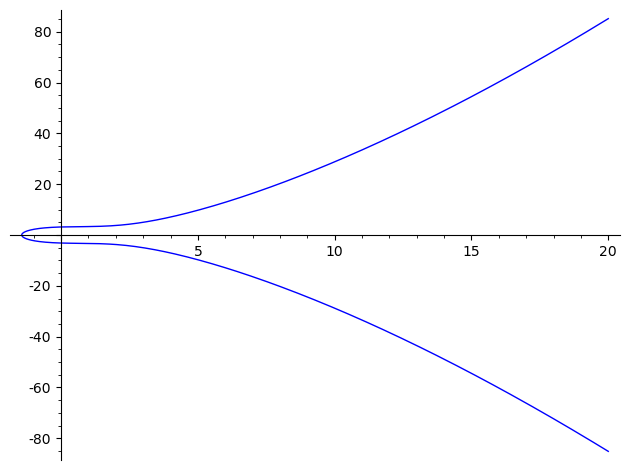

In [232]:
plot(E1, xmin=-10, xmax=20)

### Curvas elípticas definem um grupo

Primeiro, vejamos a definição de grupo. Agora que já vimos Anéis e Corpos, Grupos são bem tranquilos.

**Definição**. Um Grupo é um conjunto $G$ munido de uma operação $+$, tal que, para todos $a, b \in G$ vale que:
1. $a + b \in G$
2. $(a +b) + c  = a + (b + c)$
3. Existe $0 \in G$ tal que $a + 0 = 0 + a = a$
4. Existe $-a \in G$ tal que $a + (-a) = 0$

Quando a operação $+$ é comutativa, o grupo é chamado de **abeliano**.

Queremos mostrar que uma curva elíptica pode definir um grupo abeliano. Para isso, precisamos definir uma operação de adição e mostrar que ela satisfaz as propriedades de grupos.

In [302]:
P = E1.an_element()*20
Q = E1.an_element()*30

### Soma de dois pontos diferentes

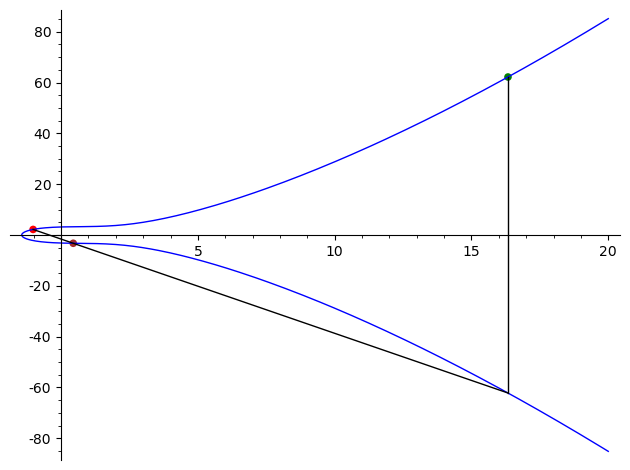

In [322]:
(plot(E1, xmin=-10, xmax=20) + 
plot(P, color='red', size=30) + 
plot(Q, color='brown', size=30) +
plot(P + Q, color='green', size=30) +
line2d([P.xy(), (-P -Q).xy()], color='black') +
line2d([(-P -Q).xy(), (P+Q).xy()], color='black')
)

### Soma de dois pontos iguais

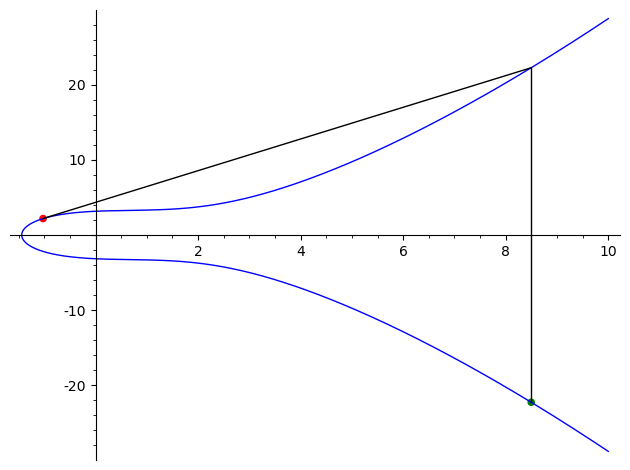

In [320]:
(plot(E1, xmin=-10, xmax=10) + 
plot(P, color='red', size=30) + 
plot(P + P, color='green', size=30) +
line2d([P.xy(), (-P -P).xy()], color='black') +
line2d([(-P -P).xy(), (P + P).xy()], color='black')
)

### Oposto de um ponto

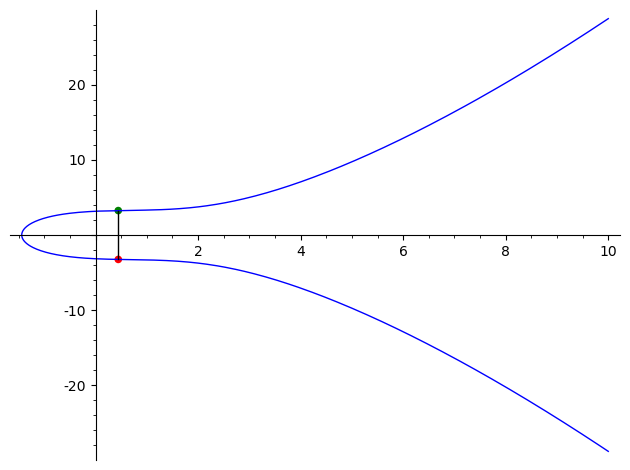

In [319]:
(plot(E1, xmin=-10, xmax=10) + 
plot(Q, color='red', size=30) + 
plot(-Q, color='green', size=30) +
line2d([Q.xy(), (-Q).xy()], color='black')
)

### O elemento neutro

Para manter a operação de soma consistente, é necessário adicionar um novo elemento, chamado **ponto no infinito** que é o ponto de encontro entre todas as retas verticais. (*pausa dramática*)

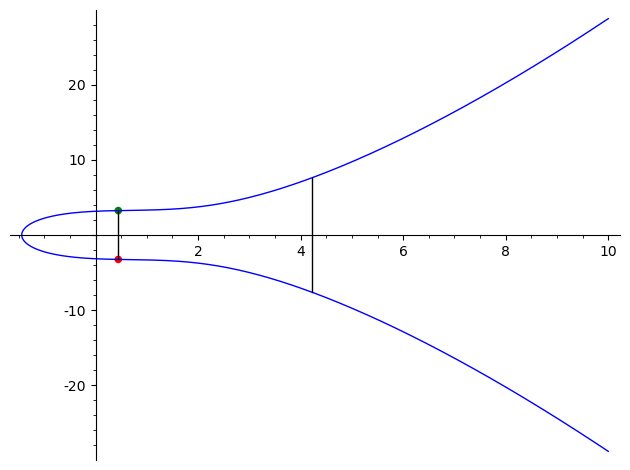

In [362]:
(plot(E1, xmin=-10, xmax=10) + 
plot(Q, color='red', size=30) + 
plot(-Q, color='green', size=30) +
line2d([Q.xy(), (-Q).xy()], color='black') +
line2d([(Q*15).xy(), (-Q*15).xy()], color='black')
)

### Observação mais importante

*Para calcular a soma de dois pontos, só são usadas operações de multiplicações e divisões de coordenadas, que são elementos do corpo $K$.*

Logo, se $P$ tem coordenadas racionais, então $2P, 3P, 4P, \ldots$ todos terão coordenadas racionais.

Em particular, se $F$ é um **corpo qualquer**, e $P$ tem coordenadas em $F$, então $2P, 3P, 4P, \ldots$ todos terão coordenadas em $F$. Para criptografia, tipicamente usamos como $F$ um corpo finito.

### Curvas Elípticas sobre corpos finitos

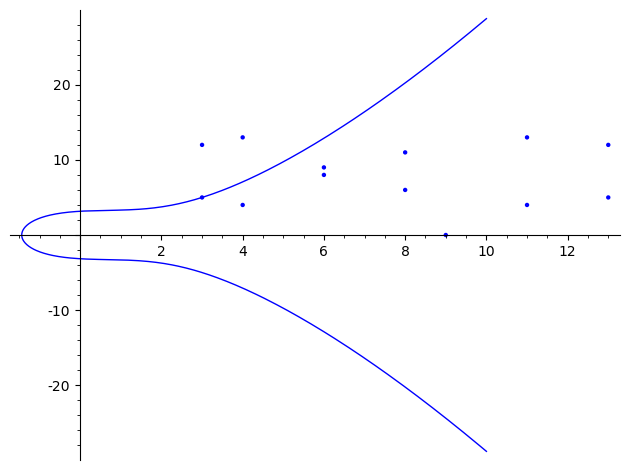

In [412]:
plot(E1, -30, 10) + plot(E1.change_ring(GF(17)))

In [398]:
poly = E1.defining_polynomial()
poly

-x^3 + 2*x^2*z + y^2*z - 2*x*z^2 - 10*z^3

In [399]:
poly.substitute(x=3, z=1)


y^2 - 25

In [408]:
poly.substitute(x=9, z=1)

y^2 - 595

### Logaritmo discreto em curvas elípticas

A dificuldade aqui vêm de que múlitplos de um ponto $P$ parecem aleatórios.

In [413]:
E1_307 = E1.change_ring(GF(307))

g = E1_307.an_element()
Ps = []

for i in range(200):
    Ps.append(scatter_plot([g*j for j in range(0, i)]))
    
a = animate(Ps)

Animation with 200 frames
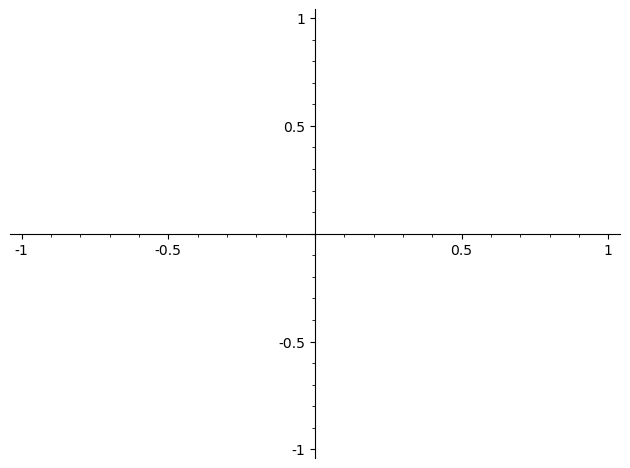

In [414]:
a

**Definição**. Dados $P$ e $Q = kP$ pontos de uma curva elíptica construída sobre o corpo finito $F$. O problema do logaritmo discreto (em Curvas Elípticas) pede para encontrar $k$ dados $P$ e $Q$.

### Curvas Elípticas em $GF(2^m)$

Podemos usar definir uma curva usando $F = GF(2^m)$. Como $F$ tem característica 2, as equações que definem as curvas elípticas podem ser simplificadas para a forma:

$$
y^2 + cy = x^3 + ax + b
$$

In [433]:
E2 = EllipticCurve(GF(2^10), [0, 0, 1, 2, 10])
E2

Elliptic Curve defined by y^2 + y = x^3 over Finite Field in z10 of size 2^10

In [439]:
len(E2.rational_points())

1089

In [446]:
P = E2.an_element()
Px, Py = P.xy()

In [450]:
Px.integer_representation(), Py.integer_representation()

(882, 311)

In [470]:
points = []
for p in E2:
    if p.is_zero():
        continue
    px, py = p.xy()
    points.append([px.integer_representation(), py.integer_representation()])

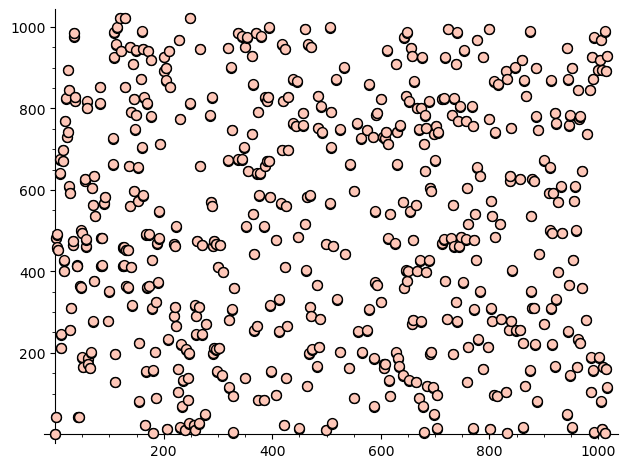

In [477]:
scatter_plot(points)